1. Исходные данные

In [4]:
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
#import matlab.engine as men

from statsmodels.stats.weightstats import ztest

In [5]:
np.random.seed(103)

#X1 ~ R(5, 15)
a = 5
b = 15
n1 = 300
X1 = np.random.uniform(a, b, size = n1)

In [36]:
m1 = 10
std1 = (100 / 12) ** 0.5

#Выборочные характеристики
m_v1 = np.mean(X1)
d_v1 = np.var(X1, ddof = 1)
std_v1 = np.std(X1, ddof = 1)

print("X1:", "m_v1 = {}, d_v1 = {}, std_v1 = {}".format(m_v1, d_v1, std_v1))

X1: m_v1 = 9.807609478409635, d_v1 = 7.916439073336831, std_v1 = 2.8136167246689503


2. Визуальное представление выборки

Text(0.5, 1.0, 'NBins = 5')

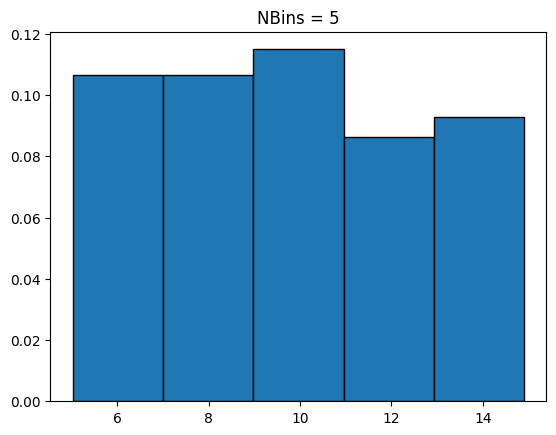

In [27]:
plt.hist(X1, bins=5, density=True, edgecolor='black')
plt.title("NBins = 5")

Text(0.5, 1.0, 'NBins = 10')

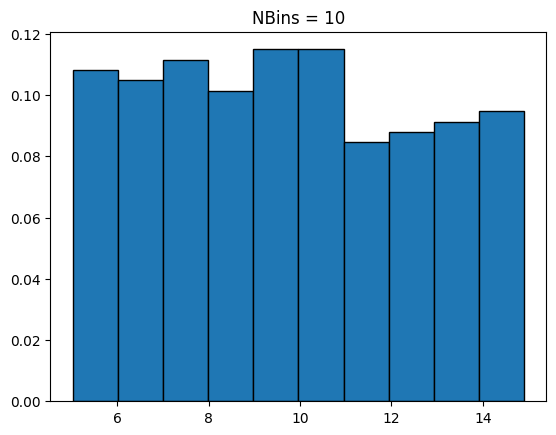

In [28]:
plt.hist(X1, bins=10, density=True, edgecolor='black')
plt.title("NBins = 10")

Text(0.5, 1.0, 'NBins = 15')

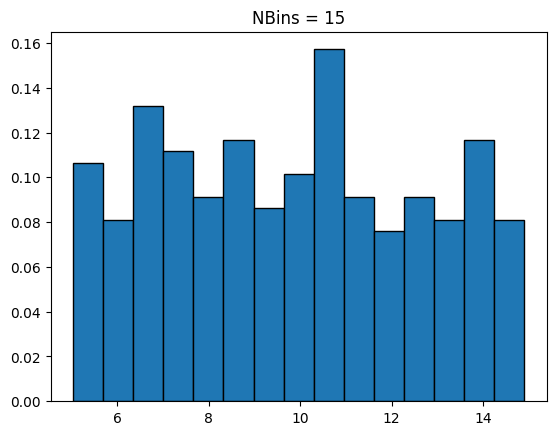

In [29]:
plt.hist(X1, bins=15, density=True, edgecolor='black')
plt.title("NBins = 15")

Text(0.5, 1.0, 'NBins = 20')

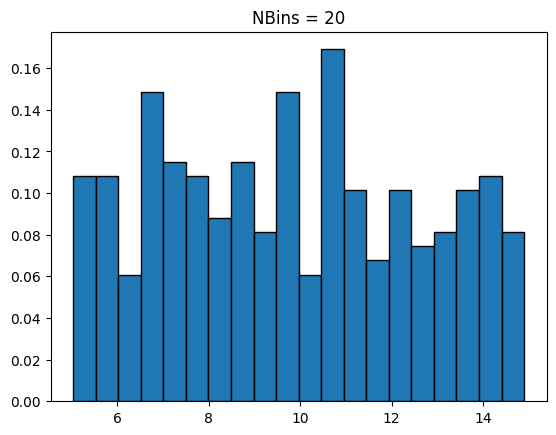

In [30]:
plt.hist(X1, bins=20, density=True, edgecolor='black')
plt.title("NBins = 20")

3. Критерий хи-квадрат

In [146]:
def chi_square(bins, f, X, ddof):
    delt = (max(X) - min(X)) / bins
    space = min(X)
    obs = [np.count_nonzero((X >= space) & (X < (space + delt)))]
   # exp = [(f.cdf(space + delt) - f.cdf(space)) * len(X)]
    exp = [(f.cdf(space + delt)) * len(X)]
    space += delt
    for i in range(bins - 2):
        obs.append(np.count_nonzero((X >= space) & (X < (space + delt))))
        exp.append((f.cdf(space + delt) - f.cdf(space)) * len(X))
        space += delt
    obs.append(np.count_nonzero((X >= space)))
    #exp.append((f.cdf(space + delt) - f.cdf(space)) * len(X))
    exp.append((1 - (f.cdf(space)))  * len(X))
    space += delt

    # print(obs)
    # print(sum(obs), len(obs))
    # print(exp)
    # print(sum(exp), len(exp))
    # print(min(X), max(X), space)

    return st.chisquare(obs, exp, ddof = ddof)

In [147]:
chi_square(5, st.norm(m_v1, std_v1), X1, 2)

Power_divergenceResult(statistic=14.96345589521571, pvalue=0.0005632832502169581)

In [111]:
chi_square(10, st.norm(m_v1, std_v1), X1, 2)

Power_divergenceResult(statistic=18.574521929971326, pvalue=0.009630022634355194)

In [112]:
chi_square(15, st.norm(m_v1, std_v1), X1, 2)

Power_divergenceResult(statistic=40.842835823556925, pvalue=5.205615067673634e-05)

In [114]:
chi_square(20, st.norm(m_v1, std_v1), X1, 2)

Power_divergenceResult(statistic=57.99845474293007, pvalue=2.239728811953801e-06)

In [118]:
a = m_v1 - std_v1 * (3 ** 0.5)
b = 2 * m_v1 - a
print(a, b)
print((a + b) / 2, ((a - b) ** 2) / 12)

4.93428235825748 14.68093659856179
9.807609478409635 7.916439073336831


In [149]:
chi_square(5, st.uniform(a, b - a), X1, 2)

Power_divergenceResult(statistic=2.542753311536501, pvalue=0.2804452792976696)

In [125]:
chi_square(10, st.uniform(a, b - a), X1, 2)

Power_divergenceResult(statistic=3.9122490390283793, pvalue=0.7898273656967136)

In [127]:
chi_square(15, st.uniform(a, b - a), X1, 2)

Power_divergenceResult(statistic=13.338949008996517, pvalue=0.34489327755713983)

In [128]:
chi_square(20, st.uniform(a, b - a), X1, 2)

Power_divergenceResult(statistic=24.37214274919904, pvalue=0.10967114266369969)

In [130]:
chi_square(5, st.chi2(5), X1, 0)

Power_divergenceResult(statistic=830.6379498481837, pvalue=1.772911945869566e-178)

In [131]:
chi_square(10, st.chi2(5), X1, 0)

Power_divergenceResult(statistic=929.2242518500232, pvalue=3.118652625131416e-194)

In [134]:
chi_square(15, st.chi2(5), X1, 0)

Power_divergenceResult(statistic=1151.0614047139052, pvalue=5.725502830140132e-237)

In [135]:
chi_square(20, st.chi2(5), X1, 0)

Power_divergenceResult(statistic=1201.438642509493, pvalue=4.562341068598762e-243)

4. Критерий Колмогорова

In [136]:
st.kstest(X1, st.norm(m_v1, std_v1).cdf)

KstestResult(statistic=0.06722160691675583, pvalue=0.12695477330623883, statistic_location=7.533227252922138, statistic_sign=1)

In [137]:
st.kstest(X1, st.uniform(a, b - a).cdf)

KstestResult(statistic=0.036404732510855076, pvalue=0.8075460470164079, statistic_location=11.304649443573384, statistic_sign=1)

In [138]:
st.kstest(X1, st.chi2(5).cdf)

KstestResult(statistic=0.606575927941565, pvalue=2.3555889519187506e-106, statistic_location=6.505477745231464, statistic_sign=-1)

Text(0.5, 1.0, 'Эмпирическая и теоретические функции распределения')

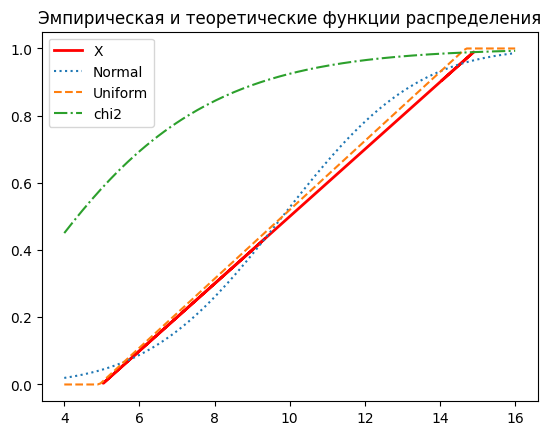

In [174]:
x = np.linspace(4, 16, 150)

Y1 = st.uniform(5, 10).cdf(X1)

plt.plot(X1, Y1, c='r', lw=2, label="X")
plt.plot(x, st.norm(m_v1, std_v1).cdf(x), ':', label="Normal")
plt.plot(x, st.uniform(a, b - a).cdf(x), '--', label="Uniform")
plt.plot(x, st.chi2(5).cdf(x),'-.', label="chi2")
plt.legend()
plt.title("Эмпирическая и теоретические функции распределения")

5. Двухвыборочные критерии

In [8]:
#X2 ~ N(10, 5)
m = 10
std2 = 5
n2 = 100
X2 = np.random.randn(n2) * std2 + m

Text(0.5, 1.0, 'HIST: X, Y')

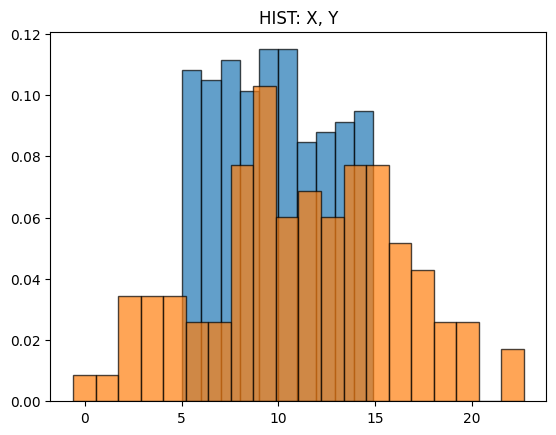

In [190]:
x = np.linspace(5, 15, 150)

plt.hist(X1, bins=10, density=True, edgecolor='black', alpha = 0.7)
plt.hist(X2, bins=20, density=True, edgecolor='black', alpha = 0.7)
plt.title("HIST: X, Y")

Text(0.5, 1.0, 'ECDF: X, Y')

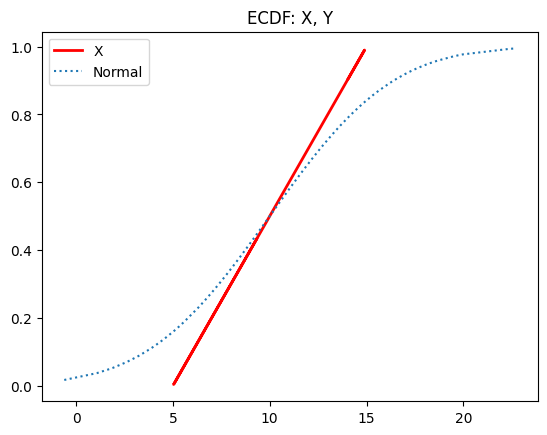

In [199]:
x = np.linspace(5, 15, 150)

X_2 = np.sort(X2)
Y1 = st.uniform(5, 10).cdf(X1)
Y2 = st.norm(10, 5).cdf(X_2)

plt.plot(X1, Y1, c='r', lw=2, label="X")
plt.plot(X_2, Y2, ':', label="Normal")

plt.legend()

plt.title("ECDF: X, Y")

In [21]:
def two_sample_chi_square(bins, X, Y, ddof):
    print(len(Y))
    delt = (max(X) - min(X)) / bins
    space = min(X)
    exp1 = [np.count_nonzero((X >= space) & (X < (space + delt)))]
   # exp = [(f.cdf(space + delt) - f.cdf(space)) * len(X)]
    exp2 = [np.count_nonzero((Y < (space + delt)))]
    space += delt
    for i in range(bins - 2):
        exp1.append(np.count_nonzero((X >= space) & (X < (space + delt))))
        exp2.append(np.count_nonzero((Y >= space) & (Y < (space + delt))))
        space += delt
    exp1.append(np.count_nonzero((X >= space)))
    exp2.append(np.count_nonzero((Y >= space)))
    space += delt

    print(exp1)
    print(sum(exp1), len(exp1))
    print(exp2)
    print(sum(exp2), len(exp2))
    print(min(X), max(X), space)

    Z = 0
    n_1 = len(X)
    n_2 = len(Y)
    for i in range (bins):
        Z += 1 / (exp1[i] + exp2[i]) * (exp1[i] / n_1 - exp2[i] / n_2) ** 2
    Z *= n_1
    Z *= n_2
    return Z
    # return st.chisquare(obs, exp, ddof = ddof)

In [26]:
Z = two_sample_chi_square(10, X1, X2, 2)
print("\n")
print("Z =", Z)
p_value= 2 * min(st.chi2(10 - 1).cdf(Z), 1 - st.chi2(10 - 1).cdf(Z))
print("p-value =", p_value)

100
[32, 31, 33, 30, 34, 34, 25, 26, 27, 28]
300 10
[22, 4, 7, 5, 7, 13, 7, 8, 12, 15]
100 10
5.036032435006273 14.897275593553852 14.89727559355385


Z = 18.606543677232835
p-value = 0.05750831296074499


In [27]:
st.ks_2samp(X1, X2)

KstestResult(statistic=0.19, pvalue=0.008200246037888137, statistic_location=5.017360765832679, statistic_sign=-1)

In [29]:
from statsmodels.stats.descriptivestats import sign_test

sign_test(X1[:100], X2)

(-4.0, 0.48411841360729146)

In [30]:
st.ranksums(X1, X2)

RanksumsResult(statistic=-0.2536830940749725, pvalue=0.7997403958727516)